### lecture 1

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
df = pd.read_csv('./dataset/kyphosis.csv')

In [88]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


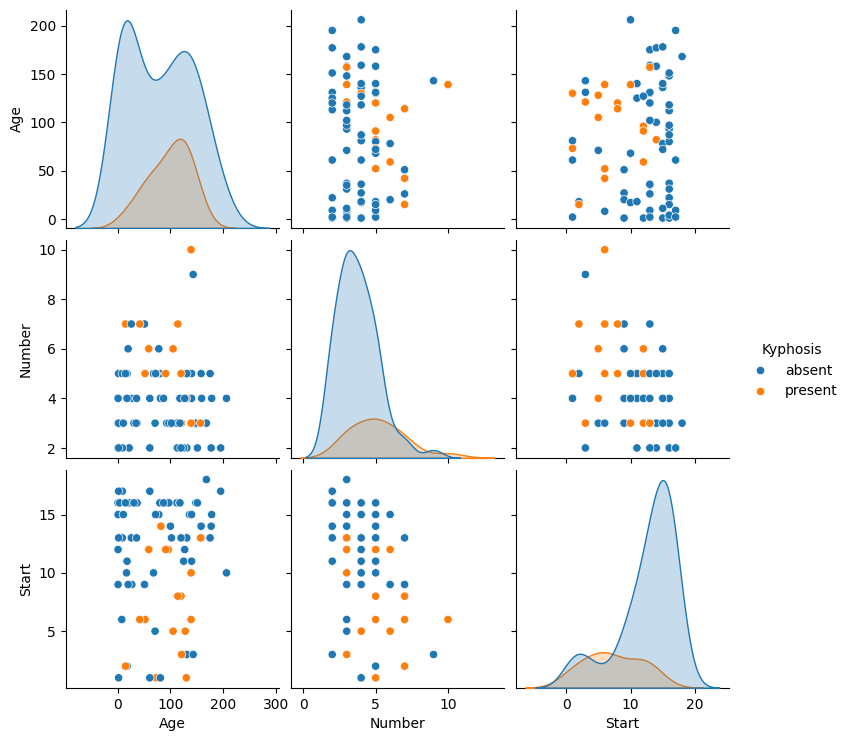

In [90]:
sns.pairplot(df,hue='Kyphosis')

#### train model

In [91]:
X = df.drop('Kyphosis',axis=1)

In [92]:
y = df['Kyphosis']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [94]:
dtree = DecisionTreeClassifier()

In [95]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [96]:
predictions = dtree.predict(X_test)

In [97]:
print(confusion_matrix(y_test,predictions))

[[12  5]
 [ 6  2]]


In [98]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



#### random forest

In [99]:
rfc = RandomForestClassifier(n_estimators=200)

In [100]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [101]:
rfc_predictions = rfc.predict(X_test)

In [102]:
print(confusion_matrix(y_test,rfc_predictions))

[[17  0]
 [ 6  2]]


In [103]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



it seems that the random forest has performed better than the decision tree

In [104]:
df['Kyphosis'].value_counts() 

Kyphosis
absent     64
present    17
Name: count, dtype: int64

the target variable is unbalanced, so the results could be biased

#### trees visualization

In [105]:
features = list(df.columns[1:])

In [106]:
features

['Age', 'Number', 'Start']

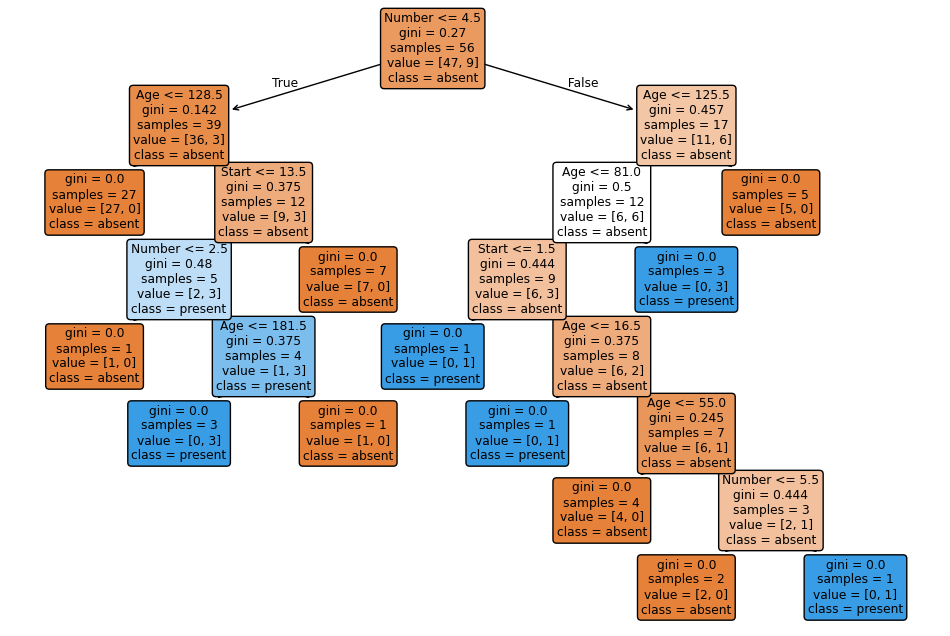

In [107]:
plt.figure(figsize=(12, 8))  
plot_tree(dtree, 
          feature_names=features, 
          class_names=['absent','present'], 
          filled=True, 
          rounded=True)

plt.show()